In [1]:
#Linear Regression for cancer prediction
# coding from scratch without using scikit

In [2]:
#reading data from csv
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize']=(20.0,10.0)
data = pd.read_csv('USCS_DemographicAge(lin).csv')
#to have a heads up about the data we are dealing with

print ("######################################################################################## \n Performing Linear regression on dataset 1\n Corelating age specific rate and the case count from a dataset")
print(data.shape)
#look at the first five rows of data for easier programming
data.head()

######################################################################################## 
 Performing Linear regression on dataset 1
 Corelating age specific rate and the case count from a dataset
(19, 6)


,CancerType,Year,Age,AgeSpecificRate,CaseCount,Population
0,'All Cancer Sites Combined','2016','1-4',22.1,3535,'15964200'
1,'All Cancer Sites Combined','2016','10-14',15.6,3224,'20627202'
2,'All Cancer Sites Combined','2016','15-19',24.0,5084,'21151384'
3,'All Cancer Sites Combined','2016','20-24',36.0,8051,'22384013'
4,'All Cancer Sites Combined','2016','25-29',60.2,13797,'22931428'


In [3]:
#appending values from columns into arrays
ASP=data['AgeSpecificRate'].values
CC=data['CaseCount'].values
print(ASP)
print(CC)

[   22.1    15.6    24.     36.     60.2    98.    146.1   227.4   348.5
    13.3   560.9   829.3  1156.3  1571.8  1893.7  2117.3  2198.3  1982.4
    28.1]
[  3535   3224   5084   8051  13797  21412  30418  44872  73074   2726
 122556 182339 225365 264524 223764 177317 129034 126512   1112]


In [4]:
xarr=np.array(ASP)
yarr=np.array(CC)

In [5]:
#calculating the regression line
#intercept and slope of the line 
asp_mean=np.mean(ASP)
cc_mean=np.mean(CC)
m=len(ASP)
j=0
k=0
for i in range(m):
    j+=(ASP[i]-asp_mean)*(CC[i]-cc_mean)
    k+=(ASP[i]-asp_mean)**2
    
#slope of the line
slope=j/k 

#intercept
intercept=cc_mean - (slope*asp_mean) 

print (slope,intercept)

88.7836631848 25015.3641216


equation of best  fit line= 25015.3641216 + 88.7836631848 x


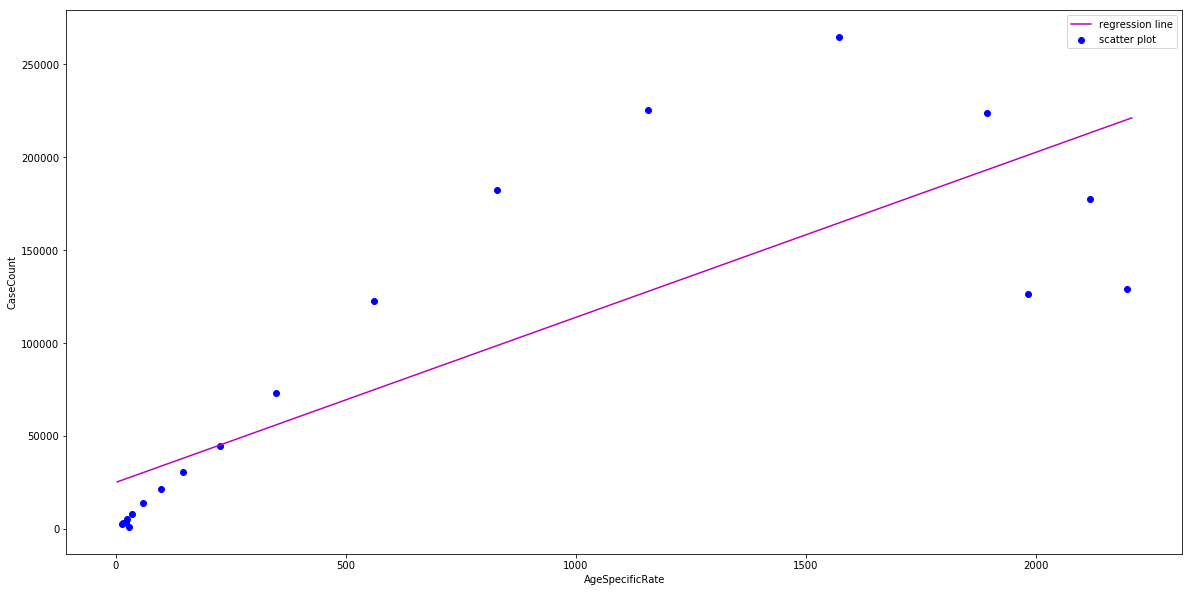

In [6]:
#plotting the values and the fit line together
#for the plot
xlim=np.max(ASP)+10
ylim=np.min(ASP)-10
x=np.linspace(ylim,xlim,1000)

#equation of line
y=intercept+slope*x
#Y=intercept+slope*X
print("equation of best  fit line=",intercept,"+",slope,"x")
plt.plot(x,y,color='m', label='regression line')
plt.scatter(xarr,yarr,c='b',label='scatter plot')

plt.xlabel('AgeSpecificRate')
plt.ylabel('CaseCount')
plt.legend()
plt.show()

In [7]:
############################TESTING###################################
#r square method to determine the fit of the line to the data
sum_sq_total =0
sum_sq_res =0

for i in range(m):
    pred_eq = intercept+slope*xarr[i]
    sum_sq_total+=(yarr[i]-cc_mean)**2
    sum_sq_res+=(yarr[i]-pred_eq)**2
    
r_square=1-(sum_sq_res/sum_sq_total)

print("r_square value=",r_square)

r_square value= 0.668377936996


In [8]:
#verification trough scipy to check the value of r is correct
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(xarr, yarr)

In [9]:
re_verif_value = r_value ** 2
print ("reverified value for r square=",re_verif_value)
np.isclose(r_square, re_verif_value, rtol=1e-15, atol=0.0)

reverified value for r square= 0.668377936996


True

In [10]:
print("######################################################################\n 2nd Regression")


######################################################################
 2nd Regression


In [11]:
plt.rcParams['figure.figsize']=(20.0,10.0)
data = pd.read_csv('sfe.csv')
#to have a heads up about the data we are dealing with

print ("######################################################################################## \nPerforming Linear regression on dataset 2")
print ("More about the dataset:\nFrom paper 'Composition-dependence of stacking fault energy in austenitic stainless steels through linear regression with random intercepts' ")
print(data.shape)
#look at the first five rows of data for easier programming
data.head()

######################################################################################## 
Performing Linear regression on dataset 2
More about the dataset:
From paper 'Composition-dependence of stacking fault energy in austenitic stainless steels through linear regression with random intercepts' 
(231, 2)


,C,SFE
0,0.063,14.0
1,0.071,17.0
2,0.057,20.0
3,0.090,30.0
4,0.040,16.0


In [12]:
#appending values from columns into arrays
C_content_wt=data['C'].values
SFE=data['SFE'].values
#print(C_content_wt) 
#print(SFE)

xarr2=np.array(C_content_wt)
yarr2=np.array(SFE)

In [13]:
#calculating the regression line
#intercept and slope of the line 
c_cont_mean=np.mean(C_content_wt)
SFE_mean=np.mean(SFE)
mm=len(C_content_wt)
jj=0
kk=0
for i in range(mm):
    jj+=(C_content_wt[i]-c_cont_mean)*(SFE[i]-SFE_mean)
    kk+=(C_content_wt[i]-c_cont_mean)**2
    
#slope of the line
slope_2=jj/kk 

#intercept
intercept_2=SFE_mean - (slope_2*c_cont_mean) 

print (slope_2,intercept_2)

-14.8227523177 34.7533148714


equation of best  fit line= 34.7533148714 + -14.8227523177 x


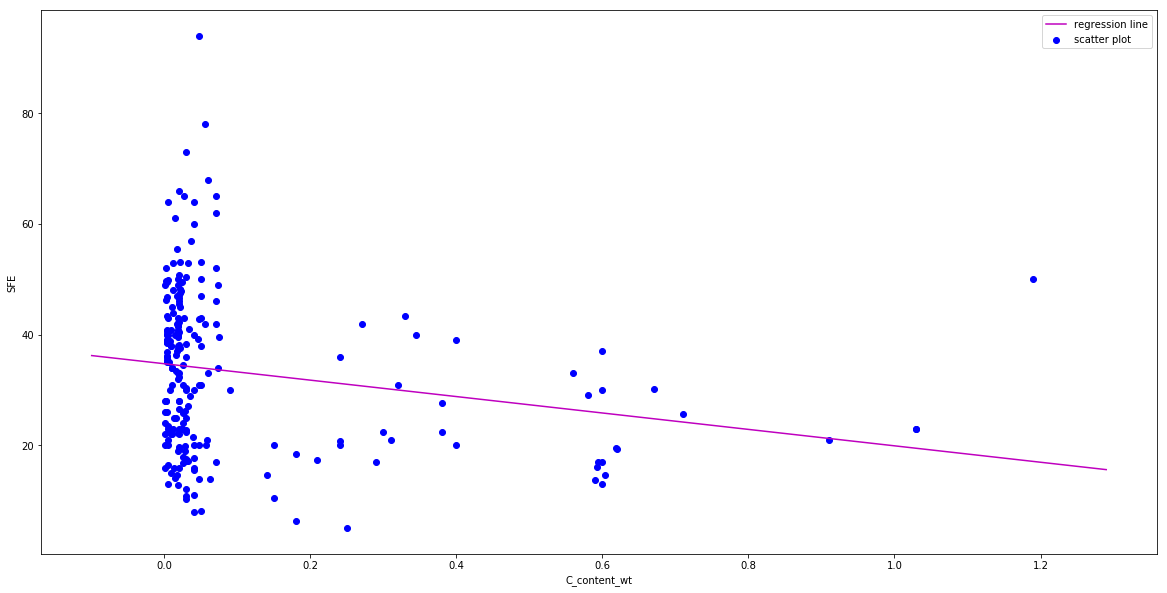

In [14]:
#plotting the values and the fit line together
#for the plot
xlim2=np.max(C_content_wt)+0.1
ylim2=np.min(C_content_wt)-0.1
x2=np.linspace(ylim2,xlim2,1000)

#equation of line
y2=intercept_2+slope_2*x2

print("equation of best  fit line=",intercept_2,"+",slope_2,"x")
plt.plot(x2,y2,color='m', label='regression line')
plt.scatter(xarr2,yarr2,c='b',label='scatter plot')

plt.xlabel('C_content_wt')
plt.ylabel('SFE')
plt.legend()
plt.show()

In [15]:
############################TESTING###################################
#r square method to determine the fit of the line to the data
sum_sq_total2 =0
sum_sq_res2 =0

for i in range(mm):
    pred_eq2 = intercept_2+slope_2*xarr2[i]
    sum_sq_total2+=(yarr2[i]-SFE_mean)**2
    sum_sq_res2+=(yarr2[i]-pred_eq2)**2
    
r_square2=1-(sum_sq_res2/sum_sq_total2)

print("r_square value for c=",r_square2)

r_square value for c= 0.0410479885356


In [16]:
#verification trough scipy to check the value of r is correct

slope, intercept, r_value, p_value, std_err = stats.linregress(xarr2, yarr2)
re_verif_value2 = r_value ** 2
print ("reverified value for r square for c=",re_verif_value2)
np.isclose(r_square2, re_verif_value2, rtol=1e-13, atol=0.0)

reverified value for r square for c= 0.0410479885356


True

we will check how other components in the alloy and SFE are corelated
######################################################################################## 
Performing Linear regression on dataset 2
More about the dataset:
From paper 'Composition-dependence of stacking fault energy in austenitic stainless steels through linear regression with random intercepts' 
(223, 3)
0.71957470718 23.7905725502
equation of best  fit line= 23.7905725502 + 0.71957470718 x


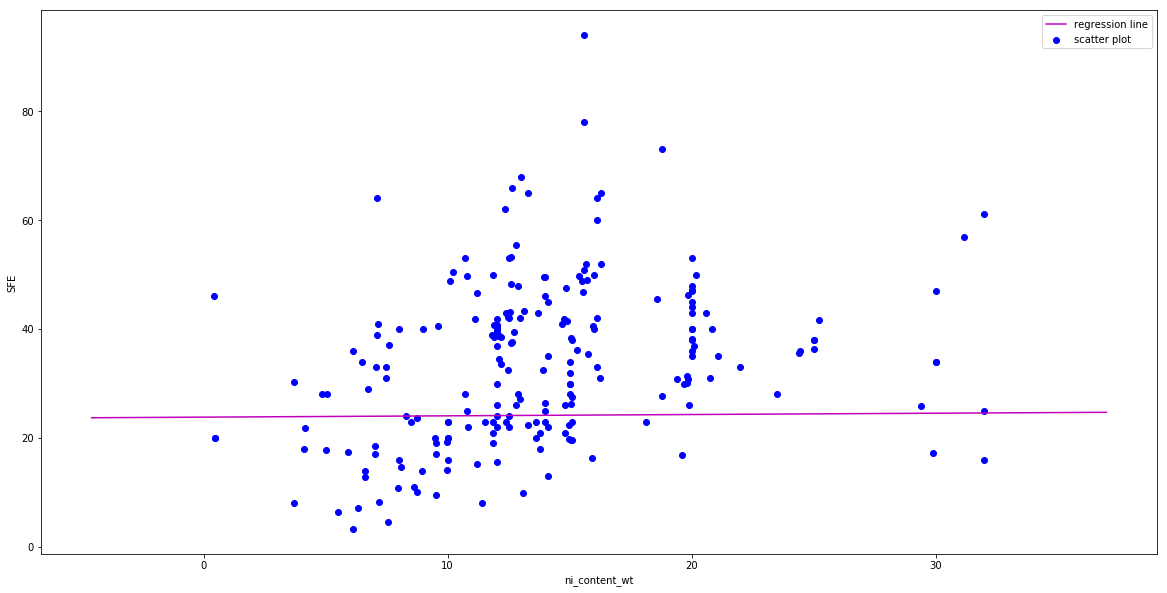

r_square value for ni= 0.0829532642716
reverified value for r square for ni= 0.0829532642716


True

In [17]:
##########################################################################
print("we will check how other components in the alloy and SFE are corelated")
#####################
#rehashing same code from above
####################
plt.rcParams['figure.figsize']=(20.0,10.0)
data = pd.read_csv('sfe_ni_cr.csv')
#to have a heads up about the data we are dealing with

print ("######################################################################################## \nPerforming Linear regression on dataset 2")
print ("More about the dataset:\nFrom paper 'Composition-dependence of stacking fault energy in austenitic stainless steels through linear regression with random intercepts' ")
print(data.shape)
#look at the first five rows of data for easier programming
data.head()

#appending values from columns into arrays
ni_content_wt=data['Ni'].values
SFE=data['SFE'].values
#print(ni_content_wt) 
#print(SFE)

xarr2a=np.array(ni_content_wt)
yarr2a=np.array(SFE)

#calculating the regression line
#intercept and slope of the line 
ni_cont_mean=np.mean(ni_content_wt)
SFE_mean=np.mean(SFE)
mm2=len(ni_content_wt)
jj2=0
kk2=0
for i in range(mm2):
    jj2+=(ni_content_wt[i]-ni_cont_mean)*(SFE[i]-SFE_mean)
    kk2+=(ni_content_wt[i]-ni_cont_mean)**2
    
#slope of the line
slope_2a=jj2/kk2 

#intercept
intercept_2a=SFE_mean - (slope_2a*ni_cont_mean) 

print (slope_2a,intercept_2a)

#plotting the values and the fit line together
#for the plot
xlim2a=np.max(ni_content_wt)+5
ylim2a=np.min(ni_content_wt)-5
x2a=np.linspace(ylim2a,xlim2a,1000)

#equation of line
y2a=intercept_2a+slope_2a*x2

print("equation of best  fit line=",intercept_2a,"+",slope_2a,"x")
plt.plot(x2a,y2a,color='m', label='regression line')
plt.scatter(xarr2a,yarr2a,c='b',label='scatter plot')

plt.xlabel('ni_content_wt')
plt.ylabel('SFE')
plt.legend()
plt.show()

############################TESTING###################################
#r square method to determine the fit of the line to the data
sum_sq_total2a =0
sum_sq_res2a =0

for i in range(mm2):
    pred_eq2a = intercept_2a+slope_2a*xarr2a[i]
    sum_sq_total2a+=(yarr2a[i]-SFE_mean)**2
    sum_sq_res2a+=(yarr2a[i]-pred_eq2a)**2
    
r_square2a=1-(sum_sq_res2a/sum_sq_total2a)

print("r_square value for ni=",r_square2a)

#verification trough scipy to check the value of r is correct

slope, intercept, r_value, p_value, std_err = stats.linregress(xarr2a, yarr2a)
re_verif_value2a = r_value ** 2
print ("reverified value for r square for ni=",re_verif_value2a)
np.isclose(r_square2a, re_verif_value2a, rtol=1e-13, atol=0.0)

we will check how other components in the alloy and SFE are corelated
######################################################################################## 
Performing Linear regression on dataset 2
More about the dataset:
From paper 'Composition-dependence of stacking fault energy in austenitic stainless steels through linear regression with random intercepts' 
(223, 3)
0.659311050035 24.6298885547
equation of best  fit line= 24.6298885547 + 0.659311050035 x


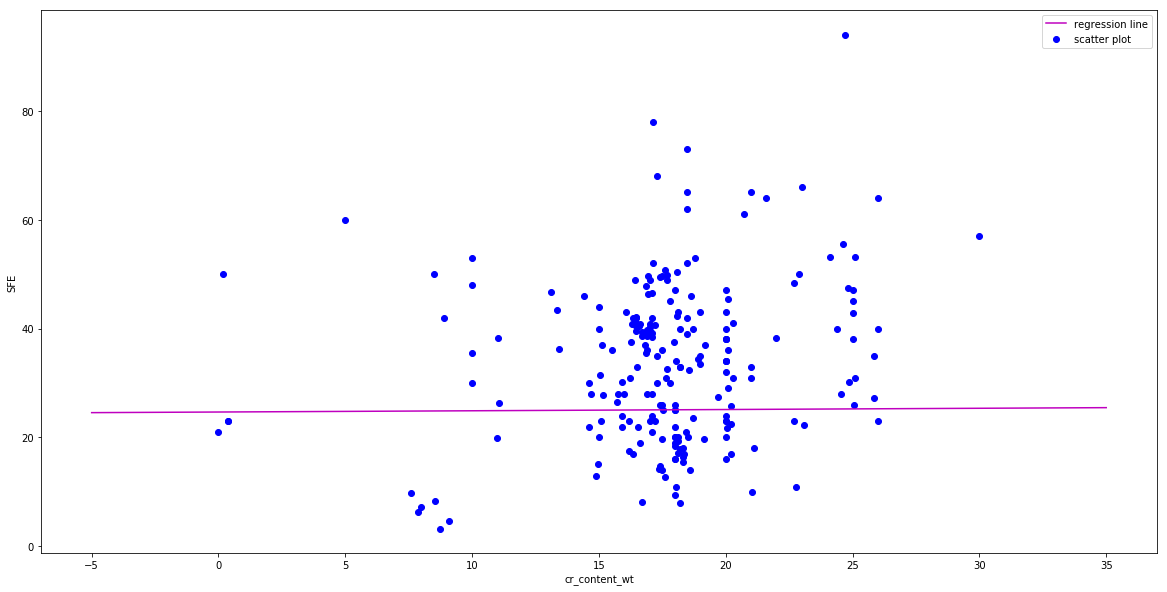

r_square value for cr= 0.0116706237977
reverified value for r square for cr= 0.0393106285513


In [18]:
##########################################################################
def lin_reg3():
    print("we will check how other components in the alloy and SFE are corelated")
    #####################
    #rehashing same code from above
    ####################
    plt.rcParams['figure.figsize']=(20.0,10.0)
    data = pd.read_csv('sfe_ni_cr.csv')
    #to have a heads up about the data we are dealing with

    print ("######################################################################################## \nPerforming Linear regression on dataset 2")
    print ("More about the dataset:\nFrom paper 'Composition-dependence of stacking fault energy in austenitic stainless steels through linear regression with random intercepts' ")
    print(data.shape)
    #look at the first five rows of data for easier programming
    data.head()

    #appending values from columns into arrays
    cr_content_wt=data['Cr'].values
    SFE=data['SFE'].values
    #print(cr_content_wt) 
    #print(SFE)

    xarr2a=np.array(cr_content_wt)
    yarr2a=np.array(SFE)

    #calculating the regression line
    #intercept and slope of the line 
    cr_cont_mean=np.mean(cr_content_wt)
    SFE_mean=np.mean(SFE)
    mm2=len(cr_content_wt)
    jj2=0
    kk2=0
    for i in range(mm2):
        jj2+=(cr_content_wt[i]-cr_cont_mean)*(SFE[i]-SFE_mean)
        kk2+=(cr_content_wt[i]-cr_cont_mean)**2

    #slope of the line
    slope_2a=jj2/kk2 

    #intercept
    intercept_2a=SFE_mean - (slope_2a*ni_cont_mean) 

    print (slope_2a,intercept_2a)

    #plotting the values and the fit line together
    #for the plot
    xlim2a=np.max(cr_content_wt)+5
    ylim2a=np.min(cr_content_wt)-5
    x2a=np.linspace(ylim2a,xlim2a,1000)

    #equation of line
    y2a=intercept_2a+slope_2a*x2

    print("equation of best  fit line=",intercept_2a,"+",slope_2a,"x")
    plt.plot(x2a,y2a,color='m', label='regression line')
    plt.scatter(xarr2a,yarr2a,c='b',label='scatter plot')

    plt.xlabel('cr_content_wt')
    plt.ylabel('SFE')
    plt.legend()
    plt.show()

    ############################TESTING###################################
    #r square method to determine the fit of the line to the data
    sum_sq_total2a =0
    sum_sq_res2a =0

    for i in range(mm2):
        pred_eq2a = intercept_2a+slope_2a*xarr2a[i]
        sum_sq_total2a+=(yarr2a[i]-SFE_mean)**2
        sum_sq_res2a+=(yarr2a[i]-pred_eq2a)**2

    r_square2a=1-(sum_sq_res2a/sum_sq_total2a)

    print("r_square value for cr=",r_square2a)

    #verification trough scipy to check the value of r is correct

    slope, intercept, r_value, p_value, std_err = stats.linregress(xarr2a, yarr2a)
    re_verif_value2a = r_value ** 2
    print ("reverified value for r square for cr=",re_verif_value2a)
    np.isclose(r_square2a, re_verif_value2a, rtol=1e-13, atol=0.0)
lin_reg3()

In [19]:
###########################################################################################################
print("Linear regression to predict the pricing of houses based on dataset where it is assumed to be depedendent on \none variable only(lotsizes) for the simplicity of the problem")

Linear regression to predict the pricing of houses based on dataset where it is assumed to be depedendent on 
one variable only(lotsizes) for the simplicity of the problem


(546, 13)
0.0435046391184 2186.66007109


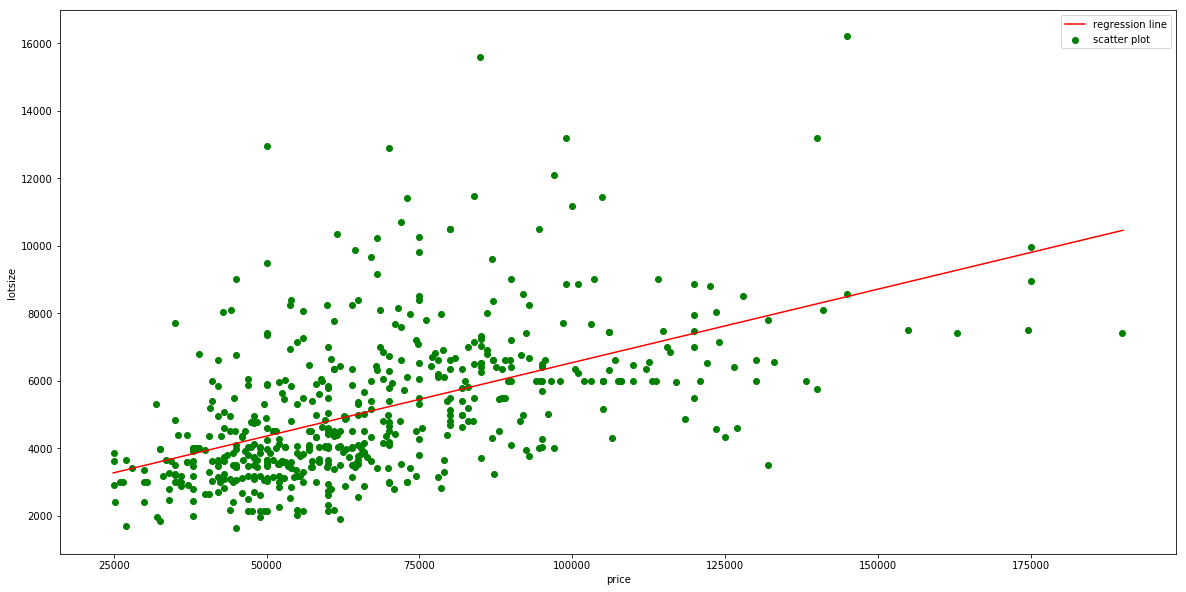

0.287077002597
reverified value for r sq= 0.287077002597


In [20]:
def lin_reg_housing():
    plt.rcParams['figure.figsize']=(20.0,10.0)
    data = pd.read_csv('housing.csv')
    print(data.shape)
    data.head()
    x=data['price'].values
    y=data['lotsize'].values
    xarr=np.array(x)
    yarr=np.array(y)
    mean_x=np.mean(x)
    mean_y=np.mean(y)
    m=len(x)
    numer=0
    denom=0
    for i in range(m):
        numer+=(x[i]-mean_x)*(y[i]-mean_y)
        denom+=(x[i]-mean_x)**2
    b1=numer/denom
    b0=mean_y - (b1*mean_x)
    print (b1,b0)
    max_x=np.max(x)+100
    min_x=np.min(x)-100
    x=np.linspace(min_x,max_x,1000)
    y=b0+b1*x
    plt.plot(x,y,color='r', label='regression line')
    plt.scatter(xarr,yarr,c='g',label='scatter plot')
    plt.xlabel('price')
    plt.ylabel('lotsize')
    plt.legend()
    plt.show()
    #rms method
    ss_t =0
    ss_r =0
    for i in range(m):
        y_pred = b0+b1*xarr[i]
        ss_t+=(yarr[i]-mean_y)**2
        ss_r+=(yarr[i]-y_pred)**2
    r2=1-(ss_r/ss_t)
    print(r2)
    slope, intercept, r_value, p_value, std_err = stats.linregress(xarr, yarr)
    re_verif_value = r_value ** 2
    print ("reverified value for r sq=",re_verif_value)
    np.isclose(r2, re_verif_value, rtol=1e-13, atol=0.0)
lin_reg_housing()

(10, 7)
[ 38.5  20.   19.4  13.7  11.    6.8   6.7   6.3   5.4   5. ]
3505.11580911 -5463.03794493


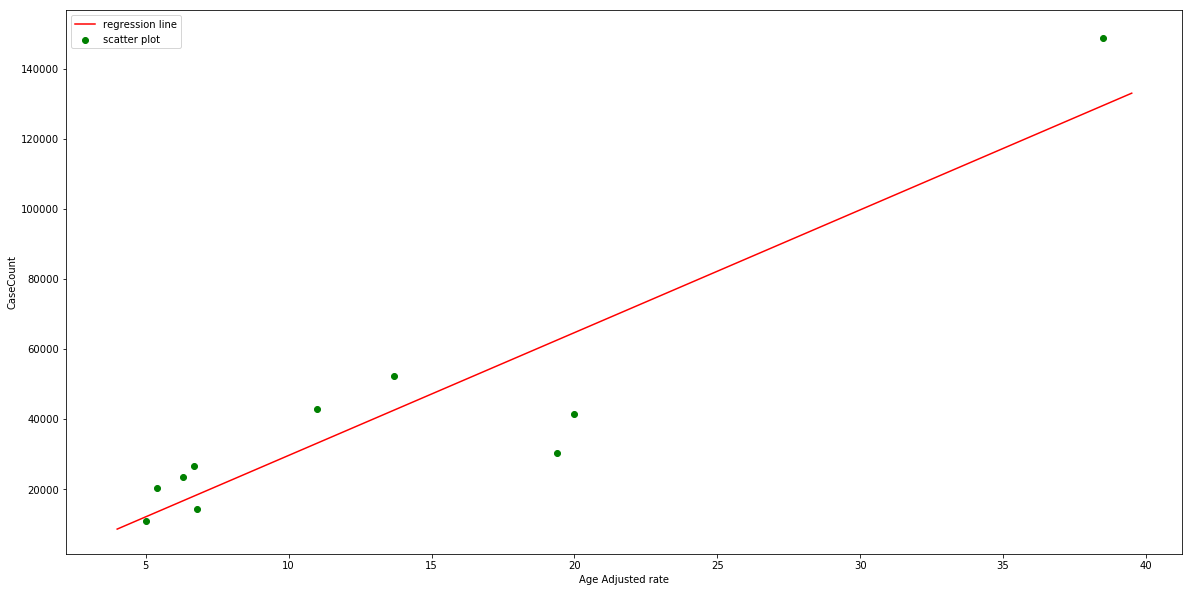

0.839790991318
reverified value for r sq= 0.839790991318


True

In [21]:
def lin_reg_death():
    plt.rcParams['figure.figsize']=(20.0,10.0)
    data = pd.read_csv('USCS_TopTen_deaths(lin).csv')
    print(data.shape)
    data.head()
    x=data['AgeAdjustedRate'].values
    y=data['CaseCount'].values
    print (x)
    xarr=np.array(x)
    yarr=np.array(y)
    mean_x=np.mean(x)
    mean_y=np.mean(y)
    m=len(x)
    numer=0
    denom=0
    for i in range(m):
        numer+=(x[i]-mean_x)*(y[i]-mean_y)
        denom+=(x[i]-mean_x)**2
    b1=numer/denom
    b0=mean_y - (b1*mean_x)
    print (b1,b0)
    max_x=np.max(x)+1
    min_x=np.min(x)-1
    x=np.linspace(min_x,max_x,1000)
    y=b0+b1*x
    plt.plot(x,y,color='r', label='regression line')
    plt.scatter(xarr,yarr,c='g',label='scatter plot')
    plt.xlabel('Age Adjusted rate')
    plt.ylabel('CaseCount')
    plt.legend()
    plt.show()
    #rms method
    ss_t =0
    ss_r =0
    for i in range(m):
        y_pred = b0+b1*xarr[i]
        ss_t+=(yarr[i]-mean_y)**2
        ss_r+=(yarr[i]-y_pred)**2
    r2=1-(ss_r/ss_t)
    print(r2)
    slope, intercept, r_value, p_value, std_err = stats.linregress(xarr, yarr)
    re_verif_value = r_value ** 2
    print ("reverified value for r sq=",re_verif_value)
    if np.isclose(r2, re_verif_value, rtol=1e-13, atol=0.0):
        return True
lin_reg_death()

In [22]:
#######################################################################################
def mult_reg():
    print("multivariate linear regression")

    ###########################################################
    #######adjusting the data##################################
    #multivariate linear regression
    my_data = pd.read_csv('Housing.csv') #read the data
    print (my_data.shape)
    my_data.head()

    x=my_data
    #print(x)

    newdf = x[x.columns[1:4]]
    #print(newdf)

    newdf = (newdf - newdf.mean())/newdf.std()
    print (newdf.shape)

    newdf.head()

    #setting the matrixes

    y = newdf.iloc[:,1:3]
    theta = np.zeros([1,3])

    print (theta)
    X = my_data.iloc[:,1:2].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray

    ones = np.ones([y.shape[0],1])
    y = np.concatenate((ones,y),axis=1)


    #set hyper parameters

    alpha = 0.01

    iters = 1000

    X = (X - X.mean())/X.std()

    #print(X)
    print (X.shape)

    #print (y)
    print (y.shape)

    def computeCost(X,y,theta):

        tobesummed = np.power(((y @ theta.T)-X),2)

        return np.sum(tobesummed)/(2 * len(y))
    def gradientDescent(X,y,theta,iters,alpha):

        cost = np.zeros(iters)

        for i in range(iters):

            theta = theta - (alpha/len(y)) * np.sum(y * (y @ theta.T - X), axis=0)

            cost[i] = computeCost(X,y,theta)



        return theta,cost



    #set hyper parameters

    alpha = 0.01

    iters = 1000



    g,cost = gradientDescent(X,y,theta,iters,alpha)

    print(g)



    finalCost = computeCost(X,y,g)

    print(finalCost)

    %matplotlib inline
    my_data = pd.read_csv('Housing.csv') #read the data
    print (my_data.shape)
    #my_data.head()
    x=my_data
    #print(x)


    newdf = x[x.columns[1:4]]
    #print(newdf)
    lotsize=np.array(newdf.iloc[:,1])
    #print (lotsize)
    price = np.array(newdf.iloc[:,0])
    #print (price)
    bedrooms = np.array(newdf.iloc[:,1])
    #print (bedrooms)

    
            
mult_reg()

multivariate linear regression
(546, 13)
(546, 3)
[[ 0.  0.  0.]]
(546, 1)
(546, 3)
[[ -2.22923023e-16   4.91909822e-01   2.92099074e-01]]
0.314865328335
(546, 13)


In [23]:
#def multireg_verify():
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
my_data = pd.read_csv('Housing.csv') #read the data
print (my_data.shape)
x=my_data
newwdf=x[x.columns[1:4]]
newwdf = (newwdf - newwdf.mean())/newwdf.std()
print(newwdf)
X = newwdf[['lotsize', 'bedrooms']]
y = newwdf['price']

X[['lotsize', 'bedrooms']] = scale.fit_transform(X[['lotsize', 'bedrooms']].as_matrix())
print (X)

est = sm.OLS(y, X).fit()

    
#multireg_verify()
est.summary()
#scaled = scale.transform ([[0.7,.945,0.05]])
#print (scaled)
#predicted = est.predict(scaled[0])
#print (predicted)


C:\Users\Pawan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(546, 13)
        price   lotsize  bedrooms
0   -0.978239  0.322732  0.047192
1   -1.109312 -0.530526 -1.308947
2   -0.697368 -0.964074  0.047192
3   -0.285425  0.691709  0.047192
4   -0.266700  0.557955 -1.308947
5   -0.079453 -0.456731  0.047192
6   -0.079453 -0.585873  0.047192
7    0.032896 -0.456731  0.047192
8    0.587147 -0.161550  0.047192
9    0.763160  0.161305  0.047192
10   0.819334  0.945380  0.047192
11  -1.408908 -0.991747 -1.308947
12  -1.539981 -1.591334  0.047192
13  -1.202936 -1.047094  0.047192
14  -1.165486 -0.715015 -1.308947
15  -1.131782 -0.906421 -1.308947
16  -1.034413 -0.853381  0.047192
17  -1.025051  0.022939  1.403330
18  -0.865891 -0.784198 -2.665085
19  -0.865891 -0.536984 -1.308947
20  -0.734818 -0.168468  0.047192
21  -0.083198 -0.295304  1.403330
22  -1.131782 -0.530526  0.047192
23  -1.128037 -0.560967 -1.308947
24  -0.978239 -0.087754 -1.308947
25  -0.967004 -0.991747 -1.308947
26  -0.922065 -0.622771 -1.308947
27  -0.903340 -0.087754 -1.308947
28  

C:\Users\Pawan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Pawan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Pawan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://

      lotsize  bedrooms
0    0.323028  0.047235
1   -0.531013 -1.310147
2   -0.964958  0.047235
3    0.692343  0.047235
4    0.558466 -1.310147
5   -0.457150  0.047235
6   -0.586410  0.047235
7   -0.457150  0.047235
8   -0.161698  0.047235
9    0.161453  0.047235
10   0.946247  0.047235
11  -0.992657 -1.310147
12  -1.592794  0.047235
13  -1.048054  0.047235
14  -0.715670 -1.310147
15  -0.907253 -1.310147
16  -0.854164  0.047235
17   0.022960  1.404617
18  -0.784917 -2.667529
19  -0.537476 -1.310147
20  -0.168623  0.047235
21  -0.295575  1.404617
22  -0.531013  0.047235
23  -0.561481 -1.310147
24  -0.087835 -1.310147
25  -0.992657 -1.310147
26  -0.623342 -1.310147
27  -0.087835 -1.310147
28  -0.992657  0.047235
29  -0.300191  0.047235
..        ...       ...
516  0.392275  0.047235
517  0.392275  1.404617
518  0.503069  1.404617
519  0.392275  0.047235
520  1.167836  1.404617
521  0.392275  1.404617
522  0.392275  1.404617
523  0.392275  1.404617
524  0.392275  1.404617
525  1.073199  0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     159.9
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           2.34e-55
Time:                        14:29:19   Log-Likelihood:                -647.99
No. Observations:                 546   AIC:                             1300.
Df Residuals:                     544   BIC:                             1309.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize        0.4910      0.034     14.278      0.000       0.423       0.559
bedrooms       0.2915      0.034      8.477      0.000       0.224       0.359
==============================================================================
Omnibus:                       77.789   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.854
Skew:                           0.833   Prob(JB):                     1.29e-32
Kurtosis:                       4.919   Cond. No.                         1.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

multivariate linear regression for auto mpg data
(392, 9)
(392, 4)
[[ 0.  0.  0.]]
(392, 1)
(392, 3)
[[ -3.80647894e-18   3.80584501e-01   3.20693300e-01]]
0.0652843020402


C:\Users\Pawan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


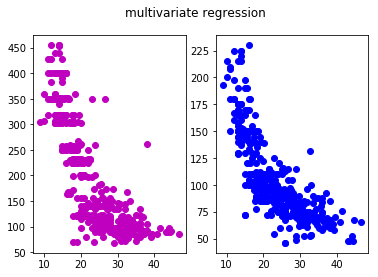

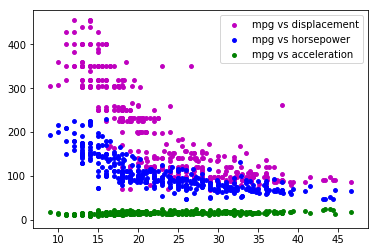

In [24]:
#############################################################################################
#######################################################################################
def mult_reg2():
    print("multivariate linear regression for auto mpg data")

    ###########################################################
    #######adjusting the data##################################
    #multivariate linear regression
    my_datta = pd.read_csv('auto-mpg(multivariate).csv') #read the data
    print (my_datta.shape)
    my_datta.head()
    x=my_datta
    #print(x)
    newwdf = x[x.columns[:4]]
    #print(newdf)
    newwdf = (newwdf - newwdf.mean())/newwdf.std()
    print (newwdf.shape)
    newwdf.head()

    #setting the matrixes

    y = newwdf.iloc[:,1:3]
    theta = np.zeros([1,3])

    print (theta)
    X = my_datta.iloc[:,1:2].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray

    ones = np.ones([y.shape[0],1])
    y = np.concatenate((ones,y),axis=1)
    

    X = (X - X.mean())/X.std()

    #print(X)
    print (X.shape)

    #print (y)
    print (y.shape)

    def computeCost(X,y,theta):

        tobesummed = np.power(((y @ theta.T)-X),2)

        return np.sum(tobesummed)/(2 * len(y))
    def gradientDescent(X,y,theta,iters,alpha):

        cost = np.zeros(iters)

        for i in range(iters):

            theta = theta - (alpha/len(y)) * np.sum(y * (y @ theta.T - X), axis=0)

            cost[i] = computeCost(X,y,theta)



        return theta,cost



    #set hyper parameters

    alpha = 0.06

    iters = 10



    g,cost = gradientDescent(X,y,theta,iters,alpha)

    print(g)



    finalCost = computeCost(X,y,g)

    print(finalCost)



    %matplotlib inline
    my_data = pd.read_csv('auto-mpg(multivariate).csv') #read the data
    #print (my_data.shape)
    #my_data.head()
    x=my_data
    #print(x)


    newdf = x[x.columns[:5]]
    #print(newdf)
    displacement=np.array(newdf.iloc[:,1])
    #print (displacement)
    mpg = np.array(newdf.iloc[:,0])
    #print (mpg)
    horsepower = np.array(newdf.iloc[:,2])
    #print (horsepower)
    weight = np.array(newdf.iloc[:,3])
    acceleration = np.array(newdf.iloc[:,4]) 
    
    
    #Y=data['price'].values
    #X=data['lotsize'].values
    
    fig,(ax1,ax2)=plt.subplots(1,2)
    fig.suptitle('multivariate regression')
    ax1.scatter(mpg,displacement,color='m', label='regression line')
    ax2.scatter(mpg,horsepower,color ='b', label ='regresssion line' )
    #plt.plot(x,y,color='m', label='regression line')
    fig.show()

    x=range(60)
    y=range(0,5000)
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1.scatter(mpg,displacement,s=15,color='m', label='mpg vs displacement')
    ax1.scatter(mpg,horsepower,s=15, color ='b', alpha =1,label ='mpg vs horsepower' )
    #ax1.scatter(mpg,weight,color ='y', label ='mpg vs weight')
    ax1.scatter(mpg,acceleration,s=15,color ='g', label ='mpg vs acceleration' )
    plt.legend(loc='upper right');
    plt.show()

            
mult_reg2()

In [25]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
my_data = pd.read_csv('auto-mpg(multivariate).csv') #read the data
print (my_data.shape)
x=my_data
nexdf=x[x.columns[:3]]
nexdf = (nexdf - nexdf.mean())/nexdf.std()
print(nexdf)
X = nexdf[['displacement', 'horsepower']]
y = nexdf['mpg']

X[['displacement', 'horsepower']] = scale.fit_transform(X[['displacement', 'horsepower']].as_matrix())

print (X)

est = sm.OLS(y, X).fit()

est.summary()

(392, 9)
          mpg  displacement  horsepower
0   -0.697747      1.075915    0.663285
1   -1.082115      1.486832    1.572585
2   -0.697747      1.181033    1.182885
3   -0.953992      1.047246    1.182885
4   -0.825870      1.028134    0.923085
5   -1.082115      2.241772    2.429924
6   -1.210238      2.480677    3.001484
7   -1.210238      2.346890    2.871584
8   -1.210238      2.490234    3.131384
9   -1.082115      1.869080    2.222085
10  -1.082115      1.802186    1.702485
11  -1.210238      1.391269    1.442685
12  -1.082115      1.964642    1.182885
13  -1.210238      2.490234    3.131384
14   0.070991     -0.777990   -0.246015
15  -0.185255      0.034288   -0.246015
16  -0.697747      0.043844   -0.194055
17  -0.313378      0.053400   -0.505815
18   0.455359     -0.930889   -0.427875
19   0.327236     -0.930889   -1.519034
20   0.199113     -0.806659   -0.453855
21   0.070991     -0.835327   -0.375915
22   0.199113     -0.863996   -0.246015
23   0.327236     -0.701540    

C:\Users\Pawan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Pawan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Pawan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     385.9
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           3.57e-93
Time:                        14:29:21   Log-Likelihood:                -341.76
No. Observations:                 392   AIC:                             687.5
Df Residuals:                     390   BIC:                             695.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
displacement    -0.5466      0.066     -8.236      0.000      -0.677      -0.416
horsepower      -0.2870      0.066     -4.325      0.000      -0.417      -0.157
==============================================================================
Omnibus:                       36.284   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.828
Skew:                           0.736   Prob(JB):                     1.84e-10
Kurtosis:                       3.760   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
################################################
#####################logistic regression################
def log_reg():
    import math

    import numpy as np

    import pandas as pd

    from pandas import DataFrame

    from sklearn import preprocessing

    df = pd.read_csv("diabetes2(logistic).csv")

    # clean up data

    # df.columns = ["grade1","grade2","label"]

    x = df["Outcome"].map(lambda x: float(str(x).rstrip(';')))

    # formats the input data into two arrays, one of independant variables

    # and one of the dependant variable

    X = df[["BMI","Outcome"]]

    X = np.array(X)

    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

    X = min_max_scaler.fit_transform(X)

    Y = df["BMI"].map(lambda x: float(str(x).rstrip(';')))

    Y = np.array(Y)

    df.head()

    print (X)

    print (X.shape)
    #X_train= np.splice(X)
    type(X)
    print(len(X))
    #X_train=np.split(X,2)
    X_train=X[:567]
    #X_train
    print(X_train.shape)
    X_test =X[201:]
    #X_test
    print(X_test.shape)

    #print (Y)
    print (Y.shape)
    type(Y)
    Y_train =Y[:567]
    #print (Y_train)
    print(Y_train.shape)
    Y_test =X[201:]
    #Y_test
    print(Y_test.shape)

    def logistic_func(z):

       pr_y = float(1.0 / float((1.0 + np.exp(-1.0*z))))

       return pr_y



    def calc_hypothesis(theta, x):

       z = 0

       for i in range(len(theta)):

          z += x[i]*theta[i]

       return logistic_func(z)

    def Cost_Function(X,Y,theta,m):

       sumOfErrors = 0

       for i in range(m):

          xi = X[i]

          hi = calc_hypothesis(theta,xi)

          if Y[i] == 1:

             error = Y[i] * math.log(hi)

          elif Y[i] == 0:

             error = (1-Y[i]) * math.log(1-hi)

          sumOfErrors += error

       const = -1/m

       J = const * sumOfErrors

       print ('cost is ', J)

       return J
    def partial_derivate_cost(X,Y,theta,j,m,alpha):

       errors_sum = 0

       for i in range(m):

          xi = X[i]

          xij = xi[j]

          hi = calc_hypothesis(theta,X[i])

          error = (hi - Y[i])*xij # partial derivative w.r.t xij

          errors_sum += error

       m = len(Y)

       constant = float(alpha)/float(m)

       J = constant * errors_sum

       return J
    def gradient_descent(X,Y,theta,m,alpha):

       theta_new = []

       for pos_i in range(len(theta)):

          CFDerivative = partial_derivate_cost(X,Y,theta,pos_i,m,alpha)

          updated_theta = theta[pos_i] - CFDerivative

          theta_new.append(updated_theta)

       return theta_new
    def logistic_regression(X,Y,alpha,theta,num_iters):

       m = len(Y)

       for x in range(num_iters):

          new_theta = gradient_descent(X,Y,theta,m,alpha)

          theta = new_theta

       return theta 
    initial_theta = [0,0] # Initial guess

    alpha = 0.1 # learning rate

    iterations = 1000 # Number of iterations

    optimal_theta = logistic_regression(X_train,Y_train,alpha,initial_theta,iterations)

    # Testing the model for accuracy

    score = 0

    length_test = len(X_test)

    for i in range(length_test):

       prediction = round(calc_hypothesis(X_test[i],optimal_theta))

       answer = Y_test[i]

       if (prediction==answer).all:

          score += 1

    #the same process is repeated for the implementation from this module and the scores compared to find the higher match-rate
    print (score)
    my_score = float(score) / float(length_test)

    print('Accuracy: {0}%'.format(round(my_score*100, 2)))
log_reg()

[[ 0.00149031  1.        ]
 [-0.2071535  -1.        ]
 [-0.30551416  1.        ]
 ..., 
 [-0.21907601 -1.        ]
 [-0.10283159  1.        ]
 [-0.09388972 -1.        ]]
(768, 2)
768
(567, 2)
(567, 2)
(768,)
(567,)
(567, 2)
567
Accuracy: 100.0%


C:\Users\Pawan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:66: RuntimeWarning: overflow encountered in exp


In [30]:
df = pd.read_csv("diabetes2(logistic).csv")
x = df["Outcome"].map(lambda x: float(str(x).rstrip(';')))
X = df[["BMI","Outcome"]]

X = np.array(X)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

X = min_max_scaler.fit_transform(X)

Y = df["BMI"].map(lambda x: float(str(x).rstrip(';')))

Y = np.array(Y)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


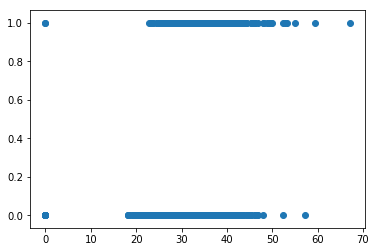

In [31]:
mydata = pd.read_csv('diabetes2(logistic).csv') #read the data
#print (mydata.shape)
mydata.head()
x=mydata
    #print(x)
ndf = x[x.columns[:9]]
bmi=np.array(ndf.iloc[:,5])
outcome =np.array(ndf.iloc[:,8])
#print (outcome)
plt.scatter(bmi,outcome)
#print(theta_new)
#plt.plot(bmi,qqqqq )
print (ndf.shape)
ndf.head()


In [32]:
data = pd.read_csv("diabetes2(logistic).csv") #importing the dataset
data.sample(5)
X = data.iloc[:,0:-1] # All columns except last one as X
y = data.iloc[:,-1] # Only last column as y

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=1) #splitting the data as train and test
X_train.shape
X_test.shape

from sklearn.linear_model import LogisticRegression
l_reg = LogisticRegression() # Making a logistic regression model
l_reg.fit(X_train,y_train) # Fitting the data
y_pred = l_reg.predict(X_test) # Predict the X_test data
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred) # calculate the accuracy

0.77489177489177485

(25, 26)
[-0.54298643 -0.63348416 -0.723981   -0.81447964 -0.90314    -1.0859728
 -1.2669683  -1.4479638  -1.62895928 -1.665158   -1.701357   -1.73755656
 -1.809954   -1.99095    -2.22       -2.208      -2.2443439  -2.28054299
 -2.31674208 -2.35294118 -2.38914027 -2.42533937 -2.46153846 -2.49773756
 -2.53393665]
[ -3.   -3.5  -4.    4.5  -5.   -6.   -7.   -8.   -9.   -9.2  -9.4  -9.6
 -10.  -11.  -12.  -12.2 -12.4 -12.6 -12.8 -13.  -13.2 -13.4 -13.6 -13.8
 -14. ]
[  -8168.4849  -11246.7262  -14852.882   -18957.0485  -23755.818
  -34379.928   -47262.674   -62246.219   -79525.027   -83199.644
  -86859.126   -90709.414   -98538.738  -120017.5    -132259.48   -148368.07
 -153418.31   -158598.22   -163710.27   -169063.32   -174443.88   -179922.75
 -185392.35   -191027.4    -196746.12  ]
[ -24505.4547  -33740.1786  -44558.646   -56871.1455  -71267.454
 -103139.784  -141788.022  -186738.657  -238575.081  -249598.932
 -260577.378  -272128.242  -295616.214  -360052.5    -396778.44   -445104.21


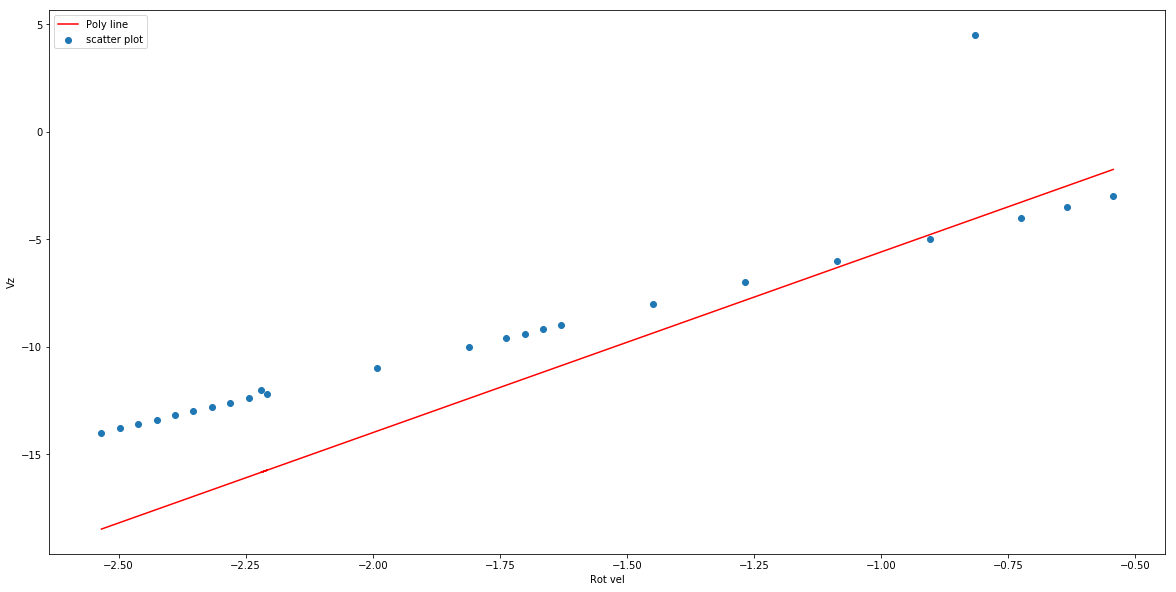

'1e+01'

In [33]:
####################################################################################
################################Polynomial Regression##############################
plt.rcParams['figure.figsize']=(20.0,10.0)
data = pd.read_csv('power gen eff data turbines (poly) reg.csv')
print(data.shape)
data.head()
blah_x=data['Rotvel'].values
blah_y=data['Vz'].values
blah_z=data['ST'].values
blah_zz=data['TT'].values
blah_pp=data['Power'].values

print(blah_x)
print(blah_y)
print(blah_z)
print(blah_zz)

print(blah_pp)
coeffs = np.polyfit(blah_x,blah_y,deg=2)
print (coeffs)

from mpl_toolkits.mplot3d import Axes3D

#x = np.arange(0, -15, 0.25)
#y = np.arange(0, -15, 0.25)
X, Y = np.meshgrid(blah_x,blah_y)
F = (np.multiply(coeffs[0],blah_x))+(np.multiply(coeffs[1],blah_x))+coeffs[2]
#F2= (np.multiply(coeffs[0],blah_y))+(np.multiply(coeffs[1],blah_y))+coeffs[2]
print (F)
blah_x.shape,blah_y.shape,blah_z.shape,blah_pp.shape,coeffs.shape, F.shape

#3 + 2*X + 4*X*Y + 5*X*X)
fig =plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Rot vel')
plt.ylabel('Vz')
ax1.scatter(blah_x,blah_y, label='scatter plot')
ax1.plot(blah_x,F, c='r', label = 'Poly line' ) #the line is actually a part of polynomial of 2nd degree.
#since the scatter plot demands that we plot a  miniscule area we end up getting a plot that looks like a line. 

plt.legend(loc='upper left');
#ax1.plot(blah_y,F2, c='y')
plt.show()
yf = np.polyval(np.poly1d(coeffs), blah_x)
yf.shape
yf
'%.1g' % max(blah_x-yf)                                   


In [ ]:
data.head()